In [6]:
#匯入套件

import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"

In [8]:
def get_history_rate_link(url):
    resp = requests.get(url)
    resp.encoding = 'utf-8'
    html = BeautifulSoup(resp.text, "lxml")
    rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
    #print(rate_table)

    history_rate_link_list = []


    for rate in rate_table:
        # 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
        currency = rate.find(name='div', attrs={'class':'visible-phone print_hide'})
        #print(currency.get_text().replace(" ", ""))  # 貨幣種類
        #print(currency)

        # 針對美金，找到其「歷史匯率」的首頁
        history_link = rate.find(name='td', attrs={'data-table':'歷史匯率'})
        #print(history_link)
        history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁
        #print(history_rate_link)
        history_rate_link_list.append(history_rate_link)

    return history_rate_link_list

In [15]:
#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料

def get_historical_plt(history_rate_link,timeframe):
    headers={
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',

    }

    quote_history_url = history_rate_link.replace("history", "quote/"+timeframe)
    resp = requests.get(quote_history_url,headers = headers)
    resp.encoding = 'utf-8'
    history = BeautifulSoup(resp.text, "lxml")
    history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

    #
    # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
    #
    date_history = []
    history_buyin = []
    history_sellout = []

    for history_rate in history_table:
        # 擷取日期資料
        date_string = history_rate.a.get_text()
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
        date_history.append(date)  # 日期歷史資料

        history_ex_rate = history_rate.find_all('td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buyin.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        history_sellout.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

    # 將匯率價格資料存成dataframe形式
    History_Ex_Rate = pd.DataFrame({'date': date_history,
                                        'buyin':history_buyin,
                                        'sellout':history_sellout})

    History_Ex_Rate = History_Ex_Rate.set_index('date')  # 指定'日期'欄位為datafram的index
    History_Ex_Rate = History_Ex_Rate.sort_index(ascending=True)

    # 畫出歷史匯率趨勢圖
    plt.figure(figsize=(15, 12))
    History_Ex_Rate[['buyin','sellout']].plot()
    
    # x軸='日期', y軸='現金買入價'與'現金賣出價'
    
    plt.legend(loc="upper left")
    plt.show()

['https://rate.bot.com.tw/xrt/history/USD?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/HKD?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/GBP?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/AUD?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/CAD?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/SGD?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/CHF?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/JPY?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/ZAR?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/SEK?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/NZD?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/THB?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/PHP?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/IDR?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/EUR?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/KRW?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/VND?Lang=zh-TW', 'https://rate.bot.com.tw/xrt/history/MYR?Lang=zh-TW', 'https://rate.bot.com.tw/xr

<Figure size 1080x864 with 0 Axes>

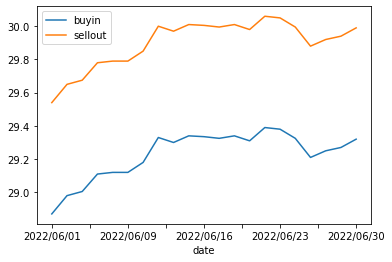

這是HKD?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

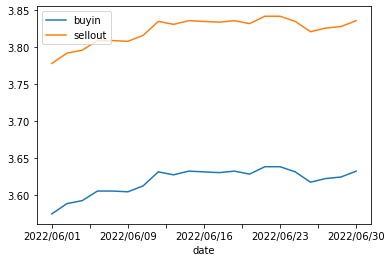

這是GBP?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

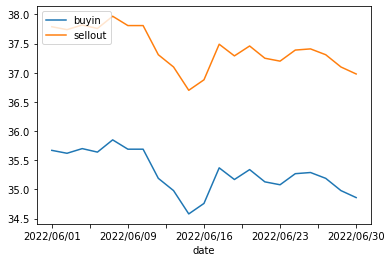

這是AUD?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

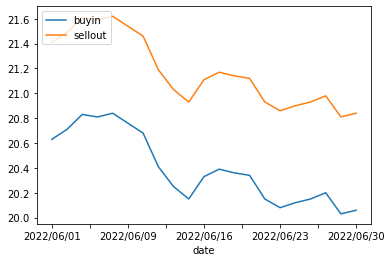

這是CAD?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

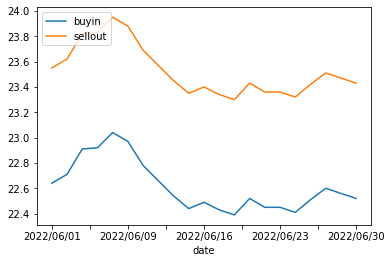

這是SGD?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

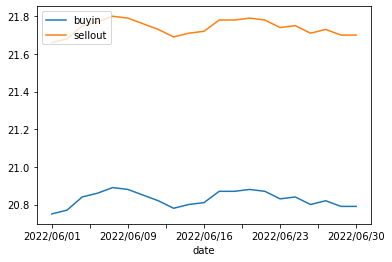

這是CHF?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

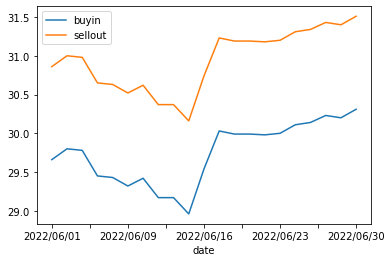

這是JPY?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

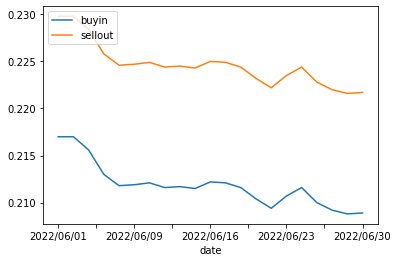

這是ZAR?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

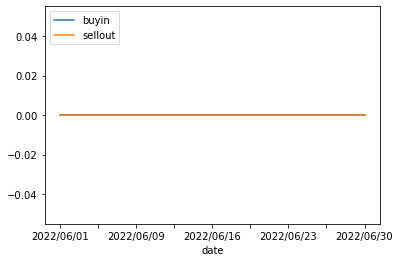

這是SEK?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

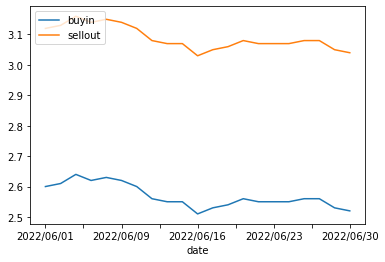

這是NZD?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

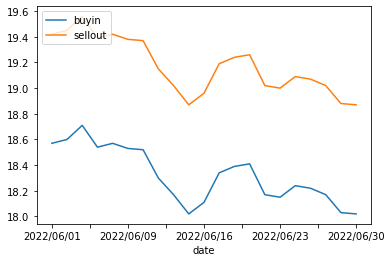

這是THB?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

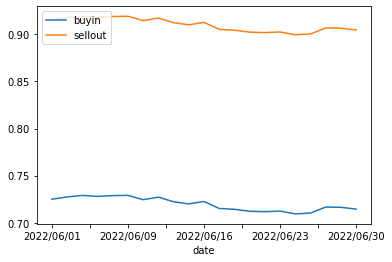

這是PHP?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

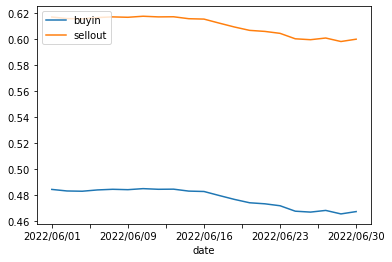

這是IDR?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

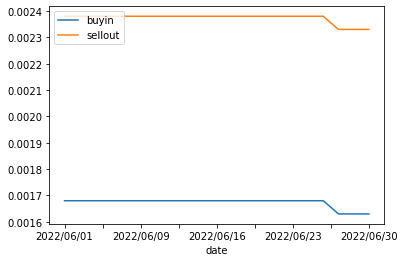

這是EUR?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

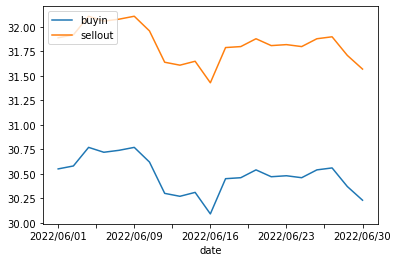

這是KRW?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

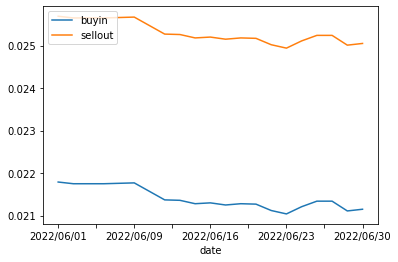

這是VND?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

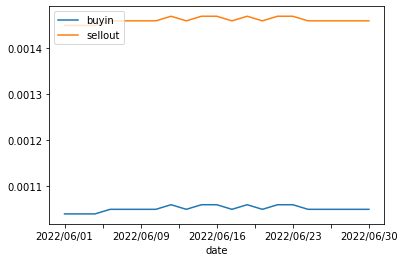

這是MYR?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

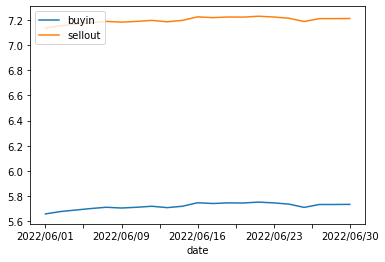

這是CNY?Lang=zh-TW在2022-06期間的數據圖：


<Figure size 1080x864 with 0 Axes>

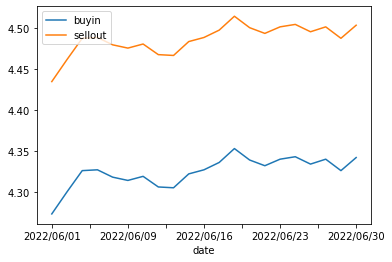

In [16]:
url_list = get_history_rate_link(url)
print(url_list)
timeframe="2022-06"   #可任意更換範圍
for ul in url_list:
    currency_name = ul.split('/')[-1]
    print(f"這是{currency_name}在{timeframe}期間的數據圖：")
    get_historical_plt(ul,timeframe)

'CNY?Lang=zh-TW'